# Análise Exploratória em Conjunto de Dados do TCE-RS

# Análise 2

# Business Understanding

    - Quais são os principais bens materiais comprados pelos órgãos públicos do Rio Grande do Sul?
    - É possível identificar algum padrão nas compras? Seja por época do ano ou por tipo de órgão comprador? 
    - O que mais é possível descobrir sobre as licitações do estado?
    - Manual disponível em: https://portalnovo.tce.rs.gov.br/repo/cex/licitacon/eValidador-licitacon-manual-layout-1.4.pdf

## Data Understanding & Data Cleaning (itens.csv)

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib as mat
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from IPython.display import display
plt.style.use('ggplot')
%matplotlib inline

In [2]:
# Gerar output consolidado na pasta raiz como serie temporal (2016-2019)
year = [2016, 2017, 2018, 2019]
cols = ['CD_ORGAO', 'ANO_LICITACAO', 'CD_TIPO_MODALIDADE', 'DS_ITEM', 'VL_UNITARIO_HOMOLOGADO']
consolidated = pd.DataFrame()

if not os.path.exists('licitacoes.csv'):
    for y in year:
        path = r'C:\Users\casoto\Desktop\TCE-RS\\' + str(y) + '\\item.csv'
        df = pd.read_csv(path, usecols = cols)
        df.head()
        consolidated = pd.concat([df, consolidated])
    consolidated.to_csv('itens.csv')

In [3]:
# Verificando bases disponiveis
path = r'C:\Users\casoto\Desktop\TCE-RS'
os.listdir(path)

['.ipynb_checkpoints',
 '2016',
 '2016.csv.zip',
 '2017',
 '2017.csv.zip',
 '2018',
 '2018.csv.zip',
 '2019',
 '2019.csv.zip',
 'Analise_1_TCE-RS.ipynb',
 'Analise_2_TCE-RS.ipynb',
 'Analise_3_TCE-RS.ipynb',
 'Descrição do Teste - Data Scientist_1.pdf',
 'itens.csv',
 'licitacoes.csv']

In [4]:
# Analisando arquivo item.csv
item = pd.read_csv(path + '\\itens.csv')
item.drop(columns = 'Unnamed: 0', inplace = True)
pd.options.display.max_columns = None # Mostrar todas as colunas
item.head()

,CD_ORGAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,DS_ITEM,VL_UNITARIO_HOMOLOGADO
0,76600,2019,PRP,Tubo de coleta a vácuo com citrato de sódio (3...,0.4800
1,76600,2019,PRP,Sonda tubo endo traqueal descartável com balão...,3.8996
2,76600,2019,PRP,"Lanceta de punção manual 21g 1,8mm x 0,8mm",0.3255
3,76600,2019,PRP,Lamina de bisturi 22,0.2570
4,76600,2019,PRP,Hastes flexíveis com pontas de algodão (tipo c...,0.0160


In [5]:
# Tamanho da base item.csv (linhas, colunas)
item.shape

(3200756, 5)

In [6]:
# Avaliação das colunas relevantes
"""
    CD_ORGAO: Codigo do orgao
    ANO_LICITACAO: Ano da licitacao (outras referencias de data nas colunas DT_ABERTURA, DT_HOMOLOGACAO, DT_ADJUDICACAO)
    CD_TIPO_MODALIDADE: Modalidade
    DS_ITEM: Descricao do item
    QT_ITENS: Quantidade de itens
    VL_UNITARIO_ESTIMADO / VL_UNITARIO_HOMOLOGADO
    VL_TOTAL_ESTIMADO / VL_TOTAL_HOMOLOGADO
    Chaves: NR_LICITACAO, ANO_LICITACAO, CD_TIPO_MODALIDADE, NR_LOTE e NR_ITEM
"""
item.loc[:, cols].head()

,CD_ORGAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,DS_ITEM,VL_UNITARIO_HOMOLOGADO
0,76600,2019,PRP,Tubo de coleta a vácuo com citrato de sódio (3...,0.4800
1,76600,2019,PRP,Sonda tubo endo traqueal descartável com balão...,3.8996
2,76600,2019,PRP,"Lanceta de punção manual 21g 1,8mm x 0,8mm",0.3255
3,76600,2019,PRP,Lamina de bisturi 22,0.2570
4,76600,2019,PRP,Hastes flexíveis com pontas de algodão (tipo c...,0.0160


In [7]:
# Procurando por registros em branco/nulos
item.loc[:, cols].isnull().sum()

CD_ORGAO                       0
ANO_LICITACAO                  0
CD_TIPO_MODALIDADE             0
DS_ITEM                        2
VL_UNITARIO_HOMOLOGADO    644538
dtype: int64

# Data Exploration

## Top 5 Modalidades mais Licitadas

In [8]:
# Contabilizar itens por modalidade, ordenando-os por valor total
pd.set_option('display.float_format', lambda x: '%.2f' % x) # Remover notacao cientifica do DataFrame
gpby_modalidade = item.loc[:, ['CD_TIPO_MODALIDADE', 'VL_UNITARIO_HOMOLOGADO']].groupby(['CD_TIPO_MODALIDADE']).sum()
gpby_modalidade['QUANTIDADE'] = item['CD_TIPO_MODALIDADE'].value_counts()
total = gpby_modalidade['VL_UNITARIO_HOMOLOGADO'].sum()
gpby_modalidade['SHAREOF'] = round(gpby_modalidade['VL_UNITARIO_HOMOLOGADO'] / total * 100, 2)
gpby_modalidade.sort_values(by = ['VL_UNITARIO_HOMOLOGADO'], ascending = False, inplace = True)

gpby_modalidade

,VL_UNITARIO_HOMOLOGADO,QUANTIDADE,SHAREOF
CD_TIPO_MODALIDADE,,,
PRP,2990371711.59,1383691,30.49
CNC,2218334992.33,210428,22.62
PRE,1627626669.13,574506,16.60
TMP,1332572319.94,319375,13.59
EST,765166935.41,7065,7.80
PRD,276062069.24,211297,2.81
CNV,189778700.75,267053,1.93
LEI,97676589.62,17134,1.00
CHP,88636362.23,43030,0.90


Text(0, 0.5, 'Soma de valor unitario homologado')

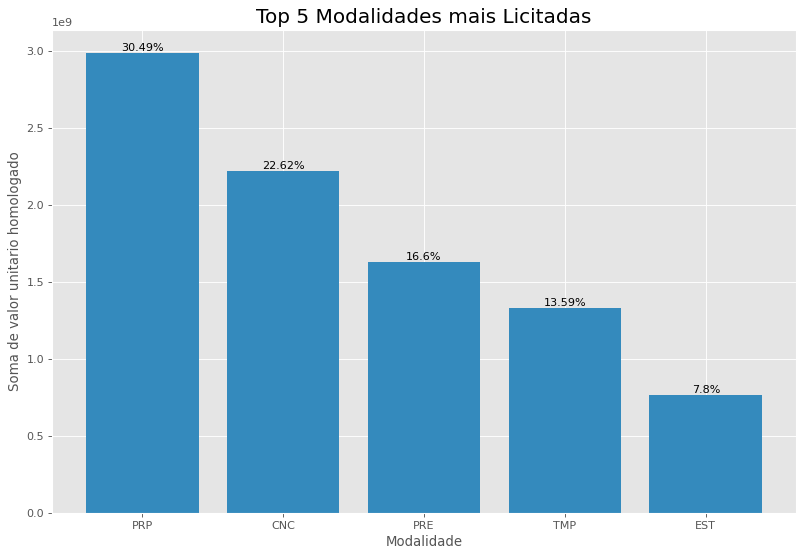

In [9]:
# Top 5 modalidades mais licitadas

figure(figsize=(12, 8), dpi=80) # Alterar escala

gpby_modalidade_subset = gpby_modalidade[:5]

plt.bar(gpby_modalidade_subset.index, gpby_modalidade_subset['VL_UNITARIO_HOMOLOGADO'])
rects = plt.bar(gpby_modalidade_subset.index, gpby_modalidade_subset['VL_UNITARIO_HOMOLOGADO']).patches
labels = gpby_modalidade_subset['SHAREOF']
for rect, label in zip(rects, labels):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height + 5, str(label)+'%',
            ha='center', va='bottom')
plt.title('Top 5 Modalidades mais Licitadas', fontsize= 18)
plt.xlabel('Modalidade', fontsize= 12)
plt.ylabel('Soma de valor unitario homologado', fontsize= 12)

        No gráfico acima, podemos evidenciar que existe uma distribuição descendente por modalidade de licitação, sendo sua maior concentração nos tipos PRP (30.49%) e CNC (22.62%)

In [10]:
# TBD: Agrupar bases com NLP (nltk?)
item_copy = item.copy()
gpby_ds_item = item_copy.loc[:, ['DS_ITEM', 'VL_UNITARIO_HOMOLOGADO']].groupby('DS_ITEM').sum()
gpby_ds_item.sort_values(by = ['DS_ITEM'])

,VL_UNITARIO_HOMOLOGADO
DS_ITEM,
"\t\tEscavadeira hidráulica DX138LC, série DHKCEBAAED0006507, ano de fabricação 2013, modelo 2013, cor laranja ITEM\tQTDE.\tUNID.\tCÓD. PEÇA\tDESCRIÇÃO DO PRODUTO - \t\tV. UNIT. (R$)\tV. TOTAL (R$) 1\t01\tUnid.\tK1026243A\tCILINDRO DE LANÇA\t16.500,70\t\t16500,70 2\t01\tUnid.\tK1026244A\tCILINDRO DE LANÇA\t16.500,00\t\t",58800.00
\t\tFORMOTEROL 12MCG + BUDESONIDA 400MCG P/INALAÇÃO C/60 DOSES - REFIL\t,68.64
"\t\tTNT roxo, 1,40 de largura, rolo de 50 metros",45.99
"\t \tTeste imunocromatografico qualitativo para deteccao simultanea do antigeno NS1 e anticorpos IgG e IgM para dengue viral humana em amostras de soro, plasma e sangue total . Kit com 20.",537.30
\t ??? ?? ???? ?? ????? ?? ??? ?? ???????? ???? ? ?????,176.00
...,...
• Jogo de chaves de fenda com 05 chaves. Descrição do produto,38.90
"• LIMPEZA INTERNA; • REMOÇÃO DO REVESTIMENTO ANTIGO ; • SUBSTITUIÇÃO DA PLACA DE REVESTIMENTO DO TETO; • COLOCAÇÃO DE ISOLAMENTO TÉRMICO NO TETO; • INSTALAÇÃO DE REVESTIMENTO NOVO (TETO, LATERAIS, FUNDO E PAINÉIS DAS PORTAS TRASEIRAS); • CONFECÇÃO DE BANCO E ESTOFADO – RESTITUIÇÕES; • REPAROS COM SOLDA MIG.",0.00
•01 - Tanque criogênico capacidade 5.000 lt para Oxigênio Medicinal (Comodato ) •01- ManyFold 15X15 cilindros de oxigênio medicinal (bacyup) •01- Vaporizador •01- Painel de controle com alarme eletrônico,0.65


        No campo 'DS_ITEM', não existe categorização nem determinação clara no campo em questão pois sua descrição é dissertativa. Por isso, foi feita abaixo uma tentativa de categorização dos textos usando a biblioteca nltk, para processamento em NLP. 

## Explorando Categorização com NLP (via biblioteca nltk)

In [11]:
# Importando bibliotecas e dependências
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.corpus.reader.chunked import ChunkedCorpusReader
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import state_union
from nltk.tokenize import PunktSentenceTokenizer
from nltk.corpus import gutenberg, wordnet
import re

In [12]:
# Atribuindo dados a lista de índice
idx = list()
for e in gpby_ds_item.index:
    idx.append(str(e).replace('\t', '').replace('•', ''))
idx
c = 0
for item in idx:
    idx[c] = item.split(' ')[:5] # Pegando apenas primeiras 5 ocorrências do texto
    try:
        for i in range(len(idx[c])):
            idx[c].remove('')
    except:
        pass
    idx[c] = ' '.join(idx[c]) # Repassando texto à um novo índice
    c += 1
idx

['Escavadeira hidráulica DX138LC, série DHKCEBAAED0006507,',
 'FORMOTEROL 12MCG + BUDESONIDA 400MCG',
 'TNT roxo, 1,40 de largura,',
 'Teste imunocromatografico qualitativo para',
 '??? ??',
 'CISCO VIC 1340',
 'Contratação de empresa(s)',
 'LICENÇA CONTROLADORA -',
 'LICENÇA PARA TELEFONE',
 'LICENÇA PARA TELEFONE',
 'LICENÇA PRIME- SWITCH',
 'LICENÇA PRIME- SWITCH',
 'LICENÇAS CONTACT CENTER',
 'MODULO AUTENTICADOR DE',
 'MÓDULO GBIC 10GBPS',
 'PLACA DE VOZ',
 'SISTEMA DE FONTE',
 'Tapete entrada do',
 'Tapete para frente',
 'Tobogã Pequeno. Conforme',
 '04 (quatro) unidades de aparelhos',
 'A - ITEM 13 -PNEU',
 'A presente licitação tem por',
 'A proposta de honorários apresentada',
 'ADAPTADOR UNIVERSAL PARA FRASCO OU',
 'ATADURA GESSADA 15CM X 3M',
 'Abacate, de 1ª qualidade, grau',
 'Adoçante liquido 100ml',
 'Ameixa vermelha, grau médio de',
 'Antibiótico a base de Benzil',
 'Aquisição de 01 cobertura em',
 'Açúcar refinado saco de',
 'Banana, caturra, grau de maturação',
 'CADE

In [13]:
# Definição de função com regex para checar caracteres especiais (retorna 1 caso exista na string, caso contrário 0)
def special_chars(s):  
    string_check= re.compile('[@_!#$%^&*()<>?/\|,.}{~:]') 
    if(string_check.search(s) == None): 
        return 0
    else: 
        return 1

In [14]:
# Remover stop words (palavras que não agregam para a definição de categoria), caracteres especiais e reassociar em novo indice
stop_words = set(nltk.corpus.stopwords.words("portuguese"))
filtered_sentence = []
ps = PorterStemmer()
new_idx = list()

for text in idx:
    words = nltk.word_tokenize(text) # Tokenize texto em palavras
    filtered_sentence = [w for w in words if not w in stop_words] # Removendo stop words do texto filtrado
    compiled = '' 
    for w in filtered_sentence:
        if special_chars(w) == 0: # Aplicando função nas palavras; concatenar apenas caso não haja caracteres especiais
            compiled += w
            compiled += ' '
    new_idx.append(compiled) # Concatenar arquivo em novo índice
new_idx

['Escavadeira hidráulica DX138LC série DHKCEBAAED0006507 ',
 'FORMOTEROL 12MCG + BUDESONIDA 400MCG ',
 'TNT roxo largura ',
 'Teste imunocromatografico qualitativo ',
 '',
 'CISCO VIC 1340 ',
 'Contratação empresa s ',
 'LICENÇA CONTROLADORA - ',
 'LICENÇA PARA TELEFONE ',
 'LICENÇA PARA TELEFONE ',
 'LICENÇA PRIME- SWITCH ',
 'LICENÇA PRIME- SWITCH ',
 'LICENÇAS CONTACT CENTER ',
 'MODULO AUTENTICADOR DE ',
 'MÓDULO GBIC 10GBPS ',
 'PLACA DE VOZ ',
 'SISTEMA DE FONTE ',
 'Tapete entrada ',
 'Tapete frente ',
 'Tobogã Pequeno Conforme ',
 '04 quatro unidades aparelhos ',
 'A - ITEM 13 -PNEU ',
 'A presente licitação ',
 'A proposta honorários apresentada ',
 'ADAPTADOR UNIVERSAL PARA FRASCO OU ',
 'ATADURA GESSADA 15CM X 3M ',
 'Abacate 1ª qualidade grau ',
 'Adoçante liquido 100ml ',
 'Ameixa vermelha grau médio ',
 'Antibiótico base Benzil ',
 'Aquisição 01 cobertura ',
 'Açúcar refinado saco ',
 'Banana caturra grau maturação ',
 'CADEIRA PARA ESCRITÓRIO Resistente ',
 "CAIXA D'ÁGUA

In [15]:
# Atualizando base com nomenclaturas dos itens tratados
gpby_ds_item['DS_ITEM_NEW'] = new_idx # Associando nova coluna de índice ao DataFrame
gpby_ds_item = gpby_ds_item.groupby('DS_ITEM_NEW').sum() # Agrupando descrições com novo índice
gpby_ds_item.sort_values(by = 'VL_UNITARIO_HOMOLOGADO', ascending = False, inplace = True)
print('Principais tipos de objetos licitados: ')
gpby_ds_item.head(20)

Principais tipos de objetos licitados: 


,VL_UNITARIO_HOMOLOGADO
DS_ITEM_NEW,
ALIENAÇÃO DOS DIREITOS CREDITÓRIOS -,464700000.00
POSSÍVEL CONTRATAÇÃO DE EMPRESA ESPECIALIZADA,463064916.00
Alienação direitos creditórios,281800000.00
EXECUÇÃO DE OBRAS DE INFRAESTRUTURA,207591010.26
Contratação empresa especializada,177019424.52
CONSTRUÇÃO DO HOSPITAL PUBLICO REGIONAL,115001498.28
OBRAS E INSTALAÇÕES,100178480.78
Construção - obra Demais,91440892.42
LOCAÇÃO E MANUTENÇÃO DE SISTEMA,90833000.00


        Nota: A descrição das categorias de objetos licitatórios ainda precisariam ser tratados com algum algoritmo de clustering (ex.: K-Means Clustering) e, provavelmente, utilizando outros recursos em NLP. 

### Fim